# S06 T01: Tarea datos, probabilidades y estadísticas
***Aprende a realizar estadísticas con Python.***
___


In [1]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from scipy import stats
import statistics as statis
import math

In [2]:
#import the dataset
nba_dataset = pd.read_csv('games_details.csv')
nba_dataset.head()

C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0


In [3]:
nba_dataset.describe().round(2)

,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,626111.00,6.261110e+05,6.261110e+05,523751.00,523751.00,523751.00,523751.00,523751.00,523751.00,523751.00,...,523751.00,523751.00,523751.00,523751.00,523751.00,523751.00,523751.00,523751.00,523751.00,500090.00
mean,21645530.61,1.610613e+09,3.451868e+05,3.57,7.88,0.42,0.75,2.12,0.20,1.74,...,1.03,3.03,4.06,2.09,0.72,0.46,1.33,2.01,9.64,-0.00
std,5656109.87,8.650000e+00,7.461713e+06,3.02,5.66,0.25,1.21,2.52,0.29,2.36,...,1.40,2.69,3.49,2.47,0.97,0.87,1.40,1.50,8.04,10.61
min,10300001.00,1.610613e+09,1.500000e+01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-57.00
25%,20600922.00,1.610613e+09,2.419000e+03,1.00,3.00,0.25,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,3.00,-7.00
50%,21200224.00,1.610613e+09,2.011440e+05,3.00,7.00,0.43,0.00,1.00,0.00,1.00,...,1.00,2.00,3.00,1.00,0.00,0.00,1.00,2.00,8.00,0.00
75%,21700202.00,1.610613e+09,2.030920e+05,5.00,11.00,0.57,1.00,3.00,0.38,3.00,...,2.00,4.00,6.00,3.00,1.00,1.00,2.00,3.00,14.00,6.00
max,52000211.00,1.610613e+09,1.962938e+09,28.00,50.00,1.00,14.00,24.00,1.00,26.00,...,18.00,25.00,31.00,25.00,10.00,12.00,12.00,15.00,81.00,57.00


In [4]:
nba_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626111 entries, 0 to 626110
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            626111 non-null  int64  
 1   TEAM_ID            626111 non-null  int64  
 2   TEAM_ABBREVIATION  626111 non-null  object 
 3   TEAM_CITY          626111 non-null  object 
 4   PLAYER_ID          626111 non-null  int64  
 5   PLAYER_NAME        626111 non-null  object 
 6   NICKNAME           10485 non-null   object 
 7   START_POSITION     239375 non-null  object 
 8   COMMENT            102359 non-null  object 
 9   MIN                523751 non-null  object 
 10  FGM                523751 non-null  float64
 11  FGA                523751 non-null  float64
 12  FG_PCT             523751 non-null  float64
 13  FG3M               523751 non-null  float64
 14  FG3A               523751 non-null  float64
 15  FG3_PCT            523751 non-null  float64
 16  FT

### Descripcion de las estidisticas de la NBA y su significado:

- MIN: El número de minutos jugados por un jugador o equipo
- FGM: El número de tiros de campo que ha hecho un jugador o equipo (Fiel goals made)
- FGA: El número de tiros de campo que ha intentado un jugador o equipo (Field goals attempted)
- FG_PCT: El porcentaje de intentos de gol de campo que hace un jugador (Field goal percentage)
- FG3M: El número de tiros de campo de 3 puntos que un jugador o equipo ha hecho (3 Point Field Goals Made)
- FG3A: El número de tiros de campo de 3 puntos que un jugador o equipo ha intentado (3 Point Field Goals Attempted)
- FG3_PCT:El porcentaje de tiros que un jugador ha hecho mientras estaba en la cancha (Percentage of Team's 3 Point Field Goals Made)
- FTM: El número de tiros libres que ha hecho un jugador o equipo (Free Throws Made)
- FTA: El número de tiros libres que un jugador o equipo ha intentado (Free Throw Attempt Rate)
- FT_PCT: El porcentaje de intentos de tiros libres que ha realizado un jugador o equipo (Free Throw Percentage)
- OREB: Numero de rebotes ofensivos que recupera un jugador o equipo en comparación con el número de oportunidades de rebote ofensivo (Offensive Rebound Chance Percentage)
- DREB: Número de rebotes que un jugador o equipo ha recogido mientras estaba en defensa (Defensive Rebounds)
- REB: Un rebote se produce cuando un jugador recupera el balón tras un tiro fallado. Esta estadística es el número total de rebotes que un jugador o equipo ha recogido en ataque o defensa (Rebounds)
- AST: El número de asistencias, pases que conducen directamente a una canasta hecha, por un jugador (Assists)
- STL: Número de veces que un jugador o equipo defensivo le quita el balón a un jugador en ataque, provocando una pérdida de balón (Steals)
- BLK: Un bloqueo ocurre cuando un jugador ofensivo intenta un tiro y el jugador defensivo inclina la pelota, bloqueando su oportunidad de anotar. (Blocks)
- TO: Un cambio de posesión ocurre cuando el jugador o el equipo en ataque pierde el balón ante la defensa (Turnover)
- PF: El número de faltas personales que cometió un jugador o equipo (Personal Fouls)
- PTS: Número de puntos anotados (puntos)
- PLUS_MINUS: La diferencia de puntos cuando un jugador o equipo está en la cancha

In [5]:
#we fill the 'null' is to 0 
nba_dataset.update(nba_dataset[['MIN','PTS','FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM', 'FTA', 'FT_PCT','OREB','DREB','REB','AST','STL','BLK','TO','PF','PLUS_MINUS']].fillna(0))

### Nivel 1
- Ejercicio 1: <br>
Coge un conjunto de datos de tema deportivo que te guste y selecciona un atributo del conjunto de datos. Calcula la moda, mediana, desviación estándar y media aritmética. 

In [15]:
mode_nba = round(nba_dataset['PTS'].mode(),2)
print('la moda de la columna de puntos anotados es {}'.format(mode_nba))

la moda de la columna de puntos anotados es 0    0.0
dtype: float64


In [16]:
median_nba = round(nba_dataset['PTS'].median(),2)
print('la mediana de la columna de puntos anotados es {}'. format(median_nba))

la mediana de la columna de puntos anotados es 6.0


In [14]:
std_nba = round(nba_dataset.PTS.std(skipna=True),2)
print("La desviacion estandar es {}".format(std_nba))

La desviacion estandar es 8.17


In [17]:
#calcute mode, mean and median from a variable
mean_nba = round(nba_dataset['PTS'].mean(),2)
print('la media de la columna de puntos anotados es: '.format(mean_nba))

la media de la columna de puntos anotados es: 


- **Ejercicio 2:**<br>
Continuando con los datos de tema deportivo, selecciona dos atributos y calcula su correlación. 

Para esta parte del ejercicio se han seleccionado los atributos *minutos de tiempo jugados* y *numero de puntos anotados* para analizar si existe correlacion entre el tiempo en la cancha del jugador y la cantidad de anotaciones que realizo. 
<br>
Para poder utilizar la variable *minutos*, se convirtio el tipo de datos de tiempo en un int, mediante una funcion que divide los minutos y quitamos los segundos.

In [41]:
def str_to_number(time_str): #function to change the type of data
    if not isinstance(time_str, str):
        return 0
    minutes, *_ = [int(x) for x in time_str.split(':')]
    return minutes

In [42]:
nba_dataset.MIN = nba_dataset.MIN.apply(str_to_number) #use of the function
nba_dataset['MIN']

0         27
1         30
2         24
3         35
4         28
          ..
626106    19
626107    23
626108    15
626109    19
626110    27
Name: MIN, Length: 626111, dtype: int64

In [45]:
#calculate of the correlation
corr_min_pts= round(nba_dataset['MIN'].corr(nba_dataset['PTS']),2)
print('La correlacion entre las variables minutos y puntos es de: ', corr_min_pts)

La correlacion entre las variables minutos y puntos es de:  0.74


Se ha obtenido una correlacion de **0.74** lo que nos indica que existe una correlacion positiva baja entre las variables seleccionadas.

### Nivel 2
- Ejercicio 3: <br>
Continuando con los datos de tema deportivo, calcula la correlación de todos los atributos entre sí y represéntalos en una matriz con distintos colores de intensidad.


In [19]:
# Calculate the correlation matrix
corr = nba_dataset.corr()
corr

,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
GAME_ID,1.000000,-0.029838,-0.006159,0.015532,0.016315,-0.023420,0.027943,0.035557,0.005113,0.001730,...,0.001984,0.013488,0.011084,0.003610,-0.011001,0.006591,-0.026330,0.000935,0.016004,-0.000001
TEAM_ID,-0.029838,1.000000,0.004861,-0.004146,-0.002659,0.000618,-0.018045,-0.022620,-0.005090,0.000460,...,0.003757,-0.008018,-0.004716,-0.010889,-0.002932,0.002664,-0.006614,-0.002660,-0.005491,-0.012060
PLAYER_ID,-0.006159,0.004861,1.000000,-0.006797,-0.007820,-0.004536,0.000859,0.001278,0.000444,-0.007533,...,-0.005822,-0.005993,-0.006799,-0.006557,-0.003833,-0.003477,-0.007351,-0.007766,-0.007046,-0.001981
FGM,0.015532,-0.004146,-0.006797,1.000000,0.907133,0.612709,0.520809,0.512746,0.392067,0.530179,...,0.359671,0.544195,0.553296,0.480421,0.377252,0.246422,0.484444,0.418345,0.967642,0.174776
FGA,0.016315,-0.002659,-0.007820,0.907133,1.000000,0.424527,0.503672,0.627342,0.338723,0.564932,...,0.364484,0.556454,0.564512,0.545693,0.414696,0.228545,0.526806,0.443789,0.905241,0.081721
FG_PCT,-0.023420,0.000618,-0.004536,0.612709,0.424527,1.000000,0.303052,0.206163,0.383365,0.268554,...,0.276414,0.389414,0.403151,0.251259,0.240233,0.223430,0.296258,0.391329,0.575157,0.155046
FG3M,0.027943,-0.018045,0.000859,0.520809,0.503672,0.303052,1.000000,0.832676,0.742311,0.212213,...,-0.035168,0.180547,0.124943,0.309747,0.218532,-0.001517,0.235043,0.179889,0.587793,0.150538
FG3A,0.035557,-0.022620,0.001278,0.512746,0.627342,0.206163,0.832676,1.000000,0.505250,0.274138,...,-0.030465,0.224916,0.160711,0.397425,0.278828,-0.001204,0.299247,0.222611,0.575507,0.072941
FG3_PCT,0.005113,-0.005090,0.000444,0.392067,0.338723,0.383365,0.742311,0.505250,1.000000,0.149822,...,-0.043648,0.130498,0.083391,0.253057,0.178072,-0.014372,0.184504,0.154907,0.438294,0.129218
FTM,0.001730,0.000460,-0.007533,0.530179,0.564932,0.268554,0.212213,0.274138,0.149822,1.000000,...,0.258479,0.399665,0.404198,0.372910,0.282763,0.181206,0.396384,0.303667,0.701976,0.106954


<AxesSubplot:>

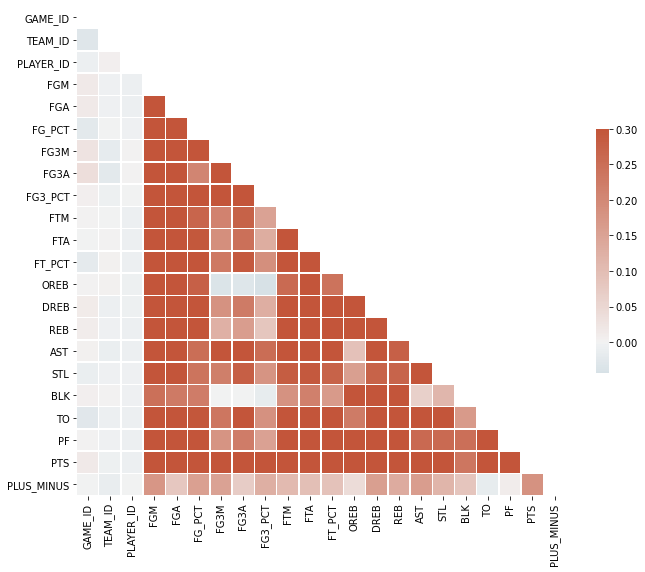

In [20]:
#Print the visualization of the correlation matrix

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Nivel 3
- Ejercicio 4:<br>
Siguiendo con los datos de tema deportivo, selecciona un atributo y calcula la media geométrica y la media armónica.

### Diferencia entre medias
La **media aritmetica**es el promedio aritmético de todos los elementos de un conjunto de datos.
<br>
La **media geometrica** se obtiene al calcular la raíz 𝑛-ésima del producto de todos los 𝑛 elementos 𝑥ᵢ en un conjunto de datos 𝑥.
<br>
La **media harmonica** es el recíproco de la media de los recíprocos (donde recíproco signica 1/values)
<br>
<br>
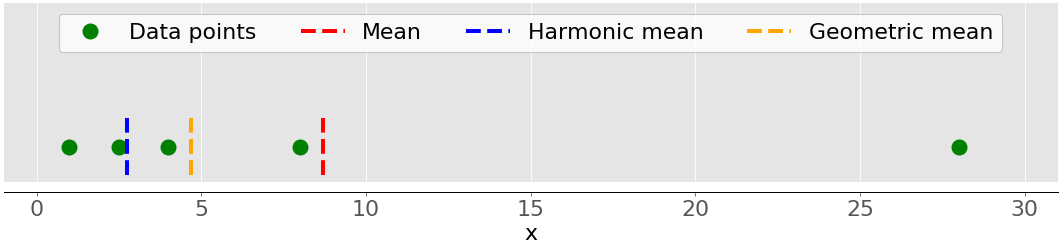
*https://realpython.com/python-statistics/*

In [88]:
gm_nba = round(scipy.stats.gmean(nba_dataset.loc[:,"PTS"]),2)
mh_nba= statis.harmonic_mean(nba_dataset['PTS'])
print('La media geometrica de la columna PTS es', gm_nba,' y la media harmonica es: ',mh_nba)

La media geometrica de la columna PTS es 0.0  y la media harmonica es:  0


Al realizar los calculos de la media geometrica y harmonica iniciales con los datos de la columna *'PTS'*, nos encontramos con que daba '0', esto es debido a los valores que se encuentran en los datos.
<br>
De acuerdo a la documentacion, para estas dos tipos de medias: Si tiene un NaN en un conjunto de datos, se devolverá nan. Si hay al menos uno 0, entonces regresará 0. Si proporciona al menos un número negativo, obtendrá Error.
<br>
Por lo tanto, para resolverlo se ha realizado un mask a los valores que eran 0 para convertirlos en 1.

In [79]:
nba_dataset['pts_clean'] = nba_dataset['PTS'].mask(nba_dataset['PTS'] == 0,1)

In [82]:
#calculate media geometrica
geo_mean=round(scipy.stats.gmean(nba_dataset.loc[:,"pts_clean"]),2)
print('La media geometrica es: ', geo_mean)

La media geometrica es:  4.76


In [84]:
ham_mean = round(statis.harmonic_mean(nba_dataset['pts_clean']))
print('La media harmonica es: ',ham_mean)

La media harmonica es:  3


In [96]:
nba_means= pd.DataFrame([['arytmethic mean',mean_nba],['geometric mean',geo_mean], ['harmonic mean',ham_mean]])
nba_means

,0,1
0,arytmethic mean,9.64
1,geometric mean,4.76
2,harmonic mean,3.00


<AxesSubplot:xlabel='0', ylabel='1'>

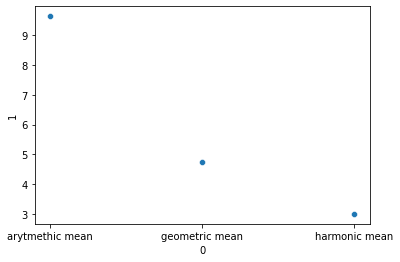

In [97]:
sns.scatterplot(x=nba_means[0], y=nba_means[1], data=nba_means)